In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#read Customertravel.csv file.
df=pd.read_csv("Customertravel.csv")

In [3]:
#shoe first 5 rows.
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [4]:
#check dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


# Label encoding

In [5]:
#categorical encoding is a process of converting categories to number.
df_a= df.select_dtypes(object)
df_b = df.select_dtypes(["int","float"])

In [6]:
#first import required library for label encoding 
from sklearn.preprocessing import LabelEncoder
for i in df_a:
    le = LabelEncoder()
    df_a[i]=le.fit_transform(df_a[i])

In [7]:
#combined dataframe rows and column.
df1=pd.concat([df_a,df_b],axis=1)

In [8]:
df1

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot,Age,ServicesOpted,Target
0,0,2,0,1,34,6,0
1,2,1,1,0,34,5,1
2,0,2,1,0,37,3,0
3,0,2,0,0,30,2,0
4,0,1,0,0,30,1,0
...,...,...,...,...,...,...,...
949,2,1,0,0,31,1,0
950,0,2,0,1,30,5,0
951,0,2,0,0,37,4,0
952,0,1,1,1,30,1,0


In [9]:
df1.head()

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot,Age,ServicesOpted,Target
0,0,2,0,1,34,6,0
1,2,1,1,0,34,5,1
2,0,2,1,0,37,3,0
3,0,2,0,0,30,2,0
4,0,1,0,0,30,1,0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   FrequentFlyer               954 non-null    int32
 1   AnnualIncomeClass           954 non-null    int32
 2   AccountSyncedToSocialMedia  954 non-null    int32
 3   BookedHotelOrNot            954 non-null    int32
 4   Age                         954 non-null    int64
 5   ServicesOpted               954 non-null    int64
 6   Target                      954 non-null    int64
dtypes: int32(4), int64(3)
memory usage: 37.4 KB


In [11]:
#separate x and y
x = df1.iloc[:,:-1]
y = df1["Target"]

In [12]:
#train test split evaluation;split original dataset into input x and output y  
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [13]:
#model building.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()
dt=DecisionTreeClassifier()

In [14]:
def md(m):
    m.fit(xtrain,ytrain)
    ypred = m.predict(xtest)
    print(classification_report(ytest,ypred))

In [15]:
#accuracy
md(lr)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       234
           1       0.59      0.43      0.50        53

    accuracy                           0.84       287
   macro avg       0.73      0.68      0.70       287
weighted avg       0.83      0.84      0.83       287



In [16]:
md(svm)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       234
           1       0.00      0.00      0.00        53

    accuracy                           0.82       287
   macro avg       0.41      0.50      0.45       287
weighted avg       0.66      0.82      0.73       287



In [17]:
md(dt)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       234
           1       0.61      0.68      0.64        53

    accuracy                           0.86       287
   macro avg       0.77      0.79      0.78       287
weighted avg       0.87      0.86      0.86       287



In [18]:
md(knn)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       234
           1       0.61      0.62      0.62        53

    accuracy                           0.86       287
   macro avg       0.76      0.77      0.76       287
weighted avg       0.86      0.86      0.86       287



Text(0.5, 1.0, 'Target (0=no, 1=yes)')

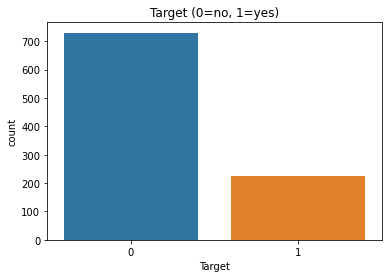

In [19]:
#the data is unbalanced,as around 72% are customer in the no-target class
ax = sns.countplot(data=df1, x='Target')
percentage = df1['Target']
plt.title('Target (0=no, 1=yes)')

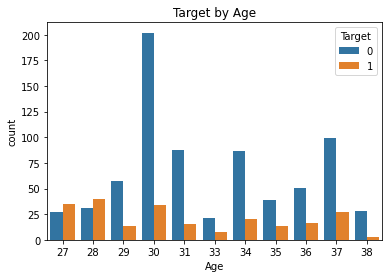

In [20]:
#It looks like customers (30-37y) tend to  proportionally more often.
#custmore churn:1 and doesnt churn:0
sns.countplot(data=df1, x='Age', hue='Target').set_title('Target by Age');

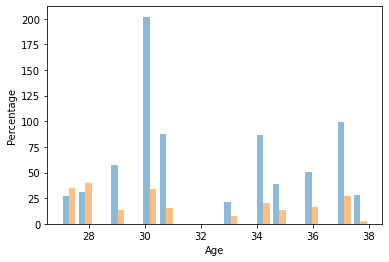

In [21]:
plt.hist([df1[df1.Target==0].Age, df1[df1.Target==1].Age], bins = 19, alpha =0.5,  align='mid',histtype = "bar", orientation='vertical',  label = ["0","1"])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()

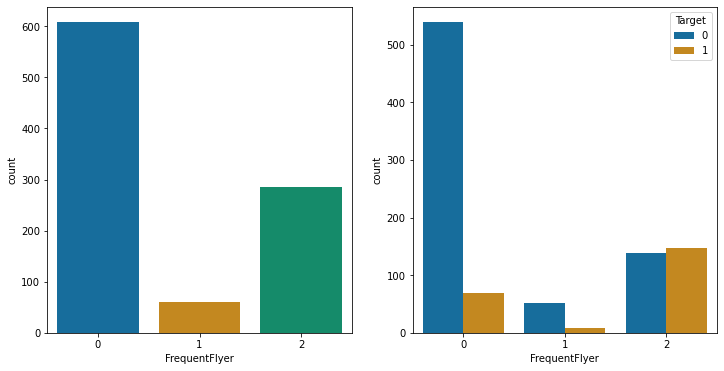

In [22]:
#Distribution of Frequent Flyer feature

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(data=df1,x='FrequentFlyer',ax=axes[0],palette='colorblind')
sns.countplot(data=df1,x='FrequentFlyer',hue='Target',ax=axes[1],palette='colorblind')
plt.show()

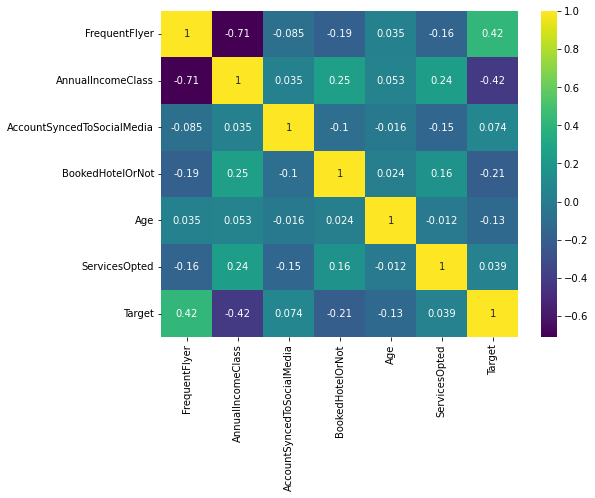

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df1.corr(),cmap='viridis',annot=True)
plt.show()

In [24]:

#Label is unbalanced. we will have to keep this in mind when developing
# the models
df["Target"].value_counts()

0    730
1    224
Name: Target, dtype: int64

In [25]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
classifier=BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),sampling_strategy='not majority',replacement=False,random_state=1)

In [27]:
classifier.fit(xtrain,ytrain)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=1, sampling_strategy='not majority')

In [28]:
ypred=classifier.predict(xtest)

In [29]:
print(classification_report(ytest,ypred))
confusion_matrix(ytest,ypred)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       234
           1       0.64      0.68      0.66        53

    accuracy                           0.87       287
   macro avg       0.78      0.80      0.79       287
weighted avg       0.87      0.87      0.87       287



array([[214,  20],
       [ 17,  36]], dtype=int64)

In [30]:
accuracy_score(ytest,ypred)

0.8710801393728222